In [1]:
import pandas as pd
from strength_covariance.model_selection import basic_outlier_removal
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn import linear_model

In [2]:
df_in = pd.read_csv("../data/models_w_props.csv")
df_in = df_in.drop([i for i in df_in.columns if 'diamond' in i], axis=1)

df_clean = basic_outlier_removal(df_in)

# set parameters
params_list_full = ['c11_fcc', 'c12_fcc', 'c44_fcc']
X = df_clean[params_list_full]
y = df_clean['strength_MPa']


In [3]:
def elastic_pipe(X, y):
    imput = KNNImputer(n_neighbors=2, weights="uniform",
                       keep_empty_features=True)
    model = linear_model.LinearRegression()

    pipe = Pipeline(steps=[('imp', imput),
                           ('lr', model)])
    pipe = TransformedTargetRegressor(regressor=pipe,
                                      transformer=None)

    pipe.fit(X, y)
    y_pred = pipe.predict(X)
    return pipe, y_pred


In [4]:
pipe, y_pred = elastic_pipe(X, y)

In [5]:
regression = pipe.regressor_.named_steps.lr

In [6]:
imputer = pipe.regressor_.named_steps.imp


In [7]:
print(imputer.get_feature_names_out())
print(regression.coef_)
print(regression.intercept_)

['c11_fcc' 'c12_fcc' 'c44_fcc']
[ 1.670686   -2.60177149 12.49910886]
437.8074067789257


In [8]:
y_pred_calculated = 0.70005179*X['c11_fcc'] - \
    1.59654439*X['c12_fcc'] + 12.991571*X['c44_fcc']
print(np.sum(y_pred_calculated - y_pred + 435.706992))

-3234.3393780998117


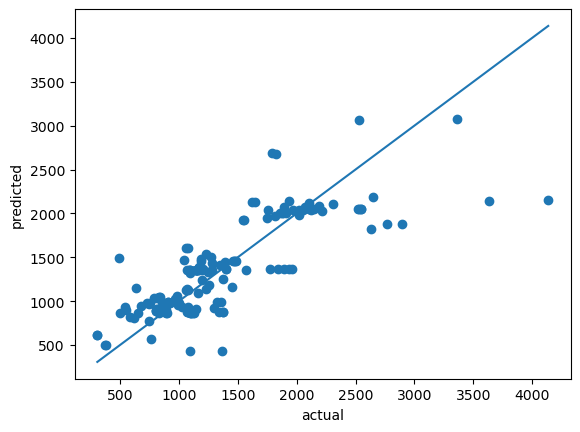

In [9]:
plt.scatter(y, y_pred)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.plot(np.linspace(min(y), max(y), 50), np.linspace(min(y), max(y), 50))
